Daniel Lee

July 25, 2018

In [3]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.graphics import utils
from matplotlib.lines import Line2D

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


from sklearn.datasets import load_boston

boston = load_boston()

bos = pd.DataFrame(boston.data)
bos.head()

bos.columns = boston.feature_names
bos.head()

# print(boston.target.shape)

bos['PRICE'] = boston.target
bos.head()

# Import regression modules
import statsmodels.api as sm

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
# print(m.summary())

from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

lm.fit(X = X, y = bos.PRICE)
y_pred = lm.predict(X = X)
lm.score(X = X, y = bos.PRICE) # R^2 value

# print('Estimated coefficients: {}\nEstimated intercept: {}'.format(lm.coef_, lm.intercept_))

# Use all 13 predictors to fit linear regression model
lm.fit(X = X, y = bos.PRICE)

# fit the linear model using all the variables and remove intercept
all_columns = "+".join(bos.columns[:-1]) # string processing to create equation
my_formula = "PRICE~" + all_columns + '-1' # string processing to remove intercept
m_no_intercept = ols(formula=my_formula, data=bos).fit()
# print(m_no_intercept.summary())

# This creates a LinearRegression object without intercept
lm_no_intercept = LinearRegression(fit_intercept = False)
lm_no_intercept.fit(X = X, y = bos.PRICE)
# print('Estimated coefficients: {}\nEstimated intercept: {}'.format(lm_no_intercept.coef_, lm_no_intercept.intercept_))

# print('Estimated intercept coefficient: {}'.format(lm.intercept_))

# print('Number of coefficients: {}'.format(len(lm.coef_)))

# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

# first five predicted prices
y_pred_sklearn_lm = lm.predict(X)
y_pred_sklearn_lm[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

# Part 3 Checkup Exercise Set IV
***

Let's look at the relationship between `PTRATIO` and housing price.

**1. Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.**

I will fit the model using both `statsmodels` and `scikit-learn` packages

In [4]:
# using statsmodel
m_ptratio_price = ols('PRICE ~ PTRATIO',bos).fit()
m_ptratio_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           1.61e-34
Time:                        18:35:14   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# using scikit-learn
# reshape the data
X_ptratio = bos.PTRATIO.values.reshape(-1, 1)

# This creates a LinearRegression object
lm_ptratio = LinearRegression()

lm_ptratio.fit(X = X_ptratio, y = bos.PRICE)
print('Estimated coefficient: {}\nEstimated intercept: {}'.format(lm_ptratio.coef_[0], lm_ptratio.intercept_))

Estimated coefficient: -2.1571752960609647
Estimated intercept: 62.34462747483265


Based on the estimates, the estimated intercept $\hat{\beta_0} = 62.345$. This means that if `PTRATIO` is zero, the predicted housing price is \$62,345. The estimated coefficient $\hat{\beta_1} = -2.157$. This means that if `PTRATIO` increases by one unit, the predicted housing price will decrease by -\$2,157.

**2. Calculate (or extract) the $R^2$ value. What does it tell you?**

In [6]:
r2_scikit_learn = lm_ptratio.score(X = X_ptratio, y = bos.PRICE)
print('R^2 from statsmodels: {}\nR^2 from scikit-learn: {}'.format(m_ptratio_price.rsquared, r2_scikit_learn))

R^2 from statsmodels: 0.257847318009223
R^2 from scikit-learn: 0.257847318009223


The $R^2$ value is 0.258. This tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model is 25.8%. The linear regression model is the following:

$$Y_i = \hat{\beta_0} + \hat{\beta_1}* X + e_i$$

where $\hat{\beta_1}$ is the coefficient representing PTRATIO and $e_i$ is the $i$th residual.

**3. Compute the $F$-statistic. What does it tell you?**

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$


In [7]:
N = len(bos.PRICE) # sample size; number of observations
K = 1 # number of variables, not including the intercept
f_scikit_learn = (r2_scikit_learn / (1 - r2_scikit_learn)) * ((N - K - 1)/K)
print('F-Statistic from statsmodels: {}\nF-Statistic from scikit-learn: {}'.format(m_ptratio_price.fvalue, f_scikit_learn))

F-Statistic from statsmodels: 175.1055428756955
F-Statistic from scikit-learn: 175.10554287569548


In [8]:
import scipy.stats
DFN = K
DFD = N - K - 1
p_value_f_scikit_learn = scipy.stats.f.sf(x = f_scikit_learn, dfn=DFN, dfd=DFD)
print('F test p-value from statsmodels: {}\nF test p-value from scikit-learn: {}'.format(m_ptratio_price.f_pvalue,\
                                                                                         p_value_f_scikit_learn))

F test p-value from statsmodels: 1.6095094784729786e-34
F test p-value from scikit-learn: 1.6095094784729786e-34


F-statistic is 175.1055 with degrees of freedom 1 and 504. The p-values, 1.6095 * 10^(-34), are very small. I would reject the following null hypothesis at significance level 0.05:

$$H_0: \beta_1 = 0$$

It seems as though $\beta_1 \neq 0$. The linear model

$$Y_i = \hat{\beta}_0 + \hat{\beta_1}X_1 + e_i$$ 

seems to fit the data better than the intercept only model

$$Y_i = \hat{\beta}_0 + e_i$$

**4. Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.**

In [9]:
print('''t-statistic for regression coefficient for PTRATIO: {}
t-statistic squared for regression coef for PTRATIO: {}
F-statistic for overall regression model: {}'''.format(m_ptratio_price.tvalues[1],\
                                                       m_ptratio_price.tvalues[1]**2,\
                                                       m_ptratio_price.fvalue))

t-statistic for regression coefficient for PTRATIO: -13.232745099777881
t-statistic squared for regression coef for PTRATIO: 175.10554287569553
F-statistic for overall regression model: 175.1055428756955


I notice that the squared value for regression coefficient PTRATIO t-statistic is equal to the F-statistic.

***
# Part 3 Checkup Exercise Set V

**Fit a linear regression model using three independent variables**

* 'CRIM' (per capita crime rate by town)
* 'RM' (average number of rooms per dwelling)
* 'PTRATIO' (pupil-teacher ratio by town)

In [10]:
# using statsmodels
m_crim_rm_ptratio_price = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
m_crim_rm_ptratio_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           1.09e-97
Time:                        18:35:14   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# using scikit-learn
# reshape the data
X_crim_rm_ptratio = bos.loc[:, ['CRIM', 'RM', 'PTRATIO']]

# This creates a LinearRegression object
lm_crim_rm_ptratio = LinearRegression()

lm_crim_rm_ptratio.fit(X =X_crim_rm_ptratio, y = bos.PRICE)
print('Estimated coefficients: {}\nEstimated intercept: {}'.format(lm_crim_rm_ptratio.coef_, lm_crim_rm_ptratio.intercept_))

Estimated coefficients: [-0.20210971  7.3815667  -1.0741868 ]
Estimated intercept: -3.3066171324064797


**1. Compute or extract the $F$-statistic. What does it tell you about the model?**

In [12]:
r2_scikit_learn_part_3_5 = lm_crim_rm_ptratio.score(X = X_crim_rm_ptratio, y = bos.PRICE)

K_part_3_5 = 3 # number of variables, not including the intercept
f_scikit_learn_part_3_5 = (r2_scikit_learn_part_3_5 / (1 - r2_scikit_learn_part_3_5)) * ((N - K_part_3_5 - 1)/K_part_3_5)
print('F-Statistic from statsmodels: {}\nF-Statistic from scikit-learn: {}'.format(m_crim_rm_ptratio_price.fvalue,\
                                                                                   f_scikit_learn_part_3_5))

F-Statistic from statsmodels: 244.22387023858764
F-Statistic from scikit-learn: 244.22387023858766


In [13]:
DFN = K_part_3_5
DFD = N - K_part_3_5 - 1
p_value_f_scikit_learn_part_3_5 = scipy.stats.f.sf(x = f_scikit_learn_part_3_5, dfn=DFN, dfd=DFD)
print('F test p-value from statsmodels: {}\nF-Statistic from scikit-learn: {}'.format(m_crim_rm_ptratio_price.f_pvalue,\
                                                                                      p_value_f_scikit_learn_part_3_5))

F test p-value from statsmodels: 1.0899937674844589e-97
F-Statistic from scikit-learn: 1.0899937674843969e-97


The F-statistic is 244.22 with degrees of freedom 3 and 502. The p-value for this F-test is 1.09 * 10^(-97). This means that I will reject the following null hypothesis at significance level 0.05:

$$H_0: \beta_i = 0, \mbox{for $i = {1, 2, 3}$}$$

It seems as though at least one of the $\beta_i$s are not equal to zero. The linear model

$$Y_i = \hat{\beta}_0 + \hat{\beta_1}X_1 + \hat{\beta_2}X_2 + \hat{\beta_3}X_3 + e_i$$ 

seems to fit the data better than the intercept only model

$$Y_i = \hat{\beta}_0 + e_i$$

**2. Compute or extract the $R^2$ statistic. What does it tell you about the model?**

In [14]:
r2_scikit_learn_part_3_5 = lm_crim_rm_ptratio.score(X = X_crim_rm_ptratio, y = bos.PRICE)
print('R^2 from statsmodels: {}\nR^2 from scikit-learn: {}'.format(m_crim_rm_ptratio_price.rsquared, r2_scikit_learn_part_3_5))

R^2 from statsmodels: 0.5934141551136979
R^2 from scikit-learn: 0.5934141551136979


The $R^2$ value is 0.593. This tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model is 59.3%. The linear regression model is the following:

$$Y_i = \hat{\beta}_0 + \hat{\beta_1}X_1 + \hat{\beta_2}X_2 + \hat{\beta_3}X_3 + e_i$$ 

where 

* $\hat{\beta_1}$ is the coefficient representing `CRIM`
* $\hat{\beta_2}$ is the coefficient representing `RM`
* $\hat{\beta_3}$ is the coefficient representing `PTRATIO`

and $e_i$ is the $i$th residual.

**3. Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.**

In [36]:
m_short_summary = pd.DataFrame({'coefficient estimates': m_crim_rm_ptratio_price.params,
                                'tvalues': m_crim_rm_ptratio_price.tvalues, 
                                'pvalues': m_crim_rm_ptratio_price.pvalues})
m_short_summary

,coefficient estimates,tvalues,pvalues
Intercept,-3.306617,-0.818840,4.132660e-01
CRIM,-0.202110,-6.301420,6.458141e-10
RM,7.381567,18.360300,5.590314e-58
PTRATIO,-1.074187,-8.081087,4.822612e-15


Based on the p-values for the t-test from the output given using `statsmodels` above, I see that all the variables except the intercept are statistically significant. This suggests the following:

* As `CRIM` increases by one unit, `PRICE` decreases by \$202.
* As `RM` increases by one unit, `PRICE` increases by \$7,382.
* As `PTRATIO` increases by one unit, `PRICE` decreases by \$-1,074.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

***
# Part 4 Checkup Exercises

**1. Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?**

I will add variables `NOX` and `LSTAT` to the model from part 3. That is, now my model will be the following:

$$Y_i = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \epsilon_i$$ 

where 

* $\beta_1$ is the coefficient representing `CRIM`
* $\beta_2$ is the coefficient representing `RM`
* $\beta_3$ is the coefficient representing `PTRATIO`
* $\beta_4$ is the coefficient representing `NOX`
* $\beta_5$ is the coefficient representing `LSTAT`

and $\epsilon_i$ is the $i$th residual.

In [16]:
# using statsmodels
m_crim_rm_ptratio_nox_lstat_price = ols('PRICE ~ CRIM + RM + PTRATIO + NOX + LSTAT',bos).fit()
m_crim_rm_ptratio_nox_lstat_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.0
Date:                Wed, 25 Jul 2018   Prob (F-statistic):          9.68e-122
Time:                        18:35:14   Log-Likelihood:                -1550.7
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5508      4.112      4.268      0.000       9.472      25.630
CRIM          -0.0605      0.031     -1.922      0.055      -0.122       0.001
RM             4.6279      0.428     10.805      0.000       3.786       5.469
PTRATIO       -0.8948      0.119     -7.511      0.000      -1.129      -0.661
NOX           -1.3536      2.552     -0.530      0.596      -6.367       3.660
LSTAT         -0.5232      0.051    -10.208      0.000      -0.624      -0.422
==============================================================================
Omnibus:                      223.920   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.962
Skew:                           1.871   Prob(JB):                    5.14e-278
Kurtosis:                       9.824   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# F-test comparison between nested model and full model using statsmodels compare_f_test method
m_crim_rm_ptratio_nox_lstat_price.compare_f_test(m_crim_rm_ptratio_price)

(69.19798186586492, 2.9509914726948665e-27, 2.0)

In [18]:
# F-test comparison between nested model and full model using statsmodels anova_lm function
from statsmodels.stats.anova import anova_lm

m01 = ols('PRICE ~ CRIM + RM + PTRATIO', data=bos).fit()
m02 = ols('PRICE ~ CRIM + RM + PTRATIO + NOX + LSTAT', data=bos).fit()
anovaResults = anova_lm(m01, m02)
print(anovaResults)

   df_resid           ssr  df_diff      ss_diff          F        Pr(>F)
0     502.0  17367.841062      0.0          NaN        NaN           NaN
1     500.0  13602.718413      2.0  3765.122648  69.197982  2.950991e-27


/root/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/root/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/root/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [19]:
# AIC comparison between restricted model and full model
print('AIC for restricted model: {}\nAIC for full model: {}'.\
      format(m_crim_rm_ptratio_price.aic, m_crim_rm_ptratio_nox_lstat_price.aic))

AIC for restricted model: 3233.1002744570037
AIC for full model: 3113.4588580966656


As a reminder, the **restricted model** or the **nested model** is the following:

$$Y_i = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \epsilon_i$$ 

where 

* $\beta_1$ is the coefficient representing `CRIM`
* $\beta_2$ is the coefficient representing `RM`
* $\beta_3$ is the coefficient representing `PTRATIO`

and $\epsilon_i$ is the $i$th residual.

And the **full model** is the following:

$$Y_i = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \epsilon_i$$ 

where 

* $\beta_1$ is the coefficient representing `CRIM`
* $\beta_2$ is the coefficient representing `RM`
* $\beta_3$ is the coefficient representing `PTRATIO`
* $\beta_4$ is the coefficient representing `NOX`
* $\beta_5$ is the coefficient representing `LSTAT`

and $\epsilon_i$ is the $i$th residual.

Here, we see that the full model fits the data better than the restricted model. Based on the F-test, we see a p-value of 2.95e-27, which means we reject the null hypothesis that the restricted model fits the data just as well as the full model.

Also, based on the AIC values, the restricted model has AIC of 3233, whereas the full model has AIC of 3113. Since the full model has the lower AIC, it suggests that **the full model fits the data better than the restricted model**.

# Part 5 Checkup Exercises

**Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.**

**1. Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?**

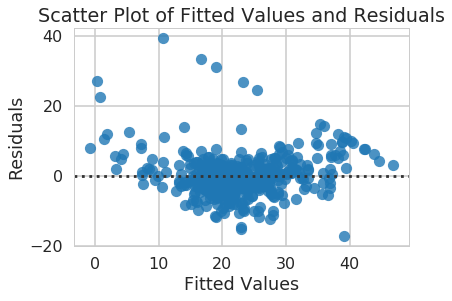

In [20]:
_ = sns.residplot(x = m_crim_rm_ptratio_price.fittedvalues, y = m_crim_rm_ptratio_price.resid)
_ = plt.xlabel('Fitted Values')
_ = plt.ylabel('Residuals')
_ = plt.title('Scatter Plot of Fitted Values and Residuals')

The plot above seems to have a slight curve (concave up/convex). There also seems to be quite a few outliers. The existence of a pattern (though slight) suggests that the distribution of the residuals do not follow a normal distribution. If the distribution of the residuals were normal, we would see a random scatter of points across all fitted values.

**2. Construct a quantile plot of the residuals. What does the plot tell you?**

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


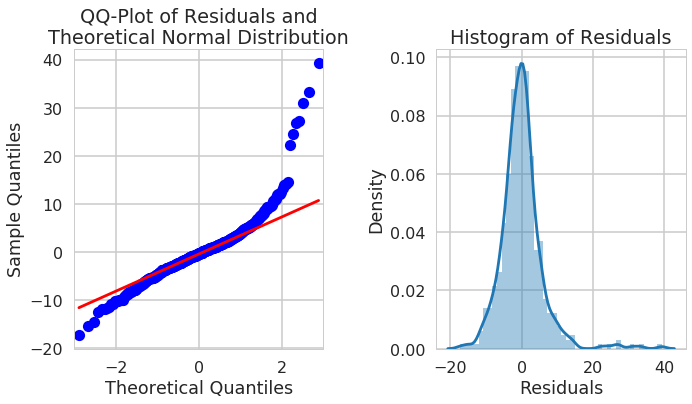

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
_ = sm.qqplot(m_crim_rm_ptratio_price.resid, line = 'q', ax = ax1)
_ = ax1.set_title('QQ-Plot of Residuals and\nTheoretical Normal Distribution')
_ = sns.distplot(m_crim_rm_ptratio_price.resid, norm_hist = True, ax = ax2)
_ = ax2.set_title('Histogram of Residuals')
_ = ax2.set_ylabel('Density')
_ = ax2.set_xlabel('Residuals')
fig.tight_layout()
fig.show()

The qq-plot above indicates that the distribution of the residuals have a long right tail (skewed right). This is verified by the histogram. According to the qq-plot, the distribution of the residuals also has a slightly longer left tail than a normal distribution. So I would conclude that the distribution of the residuals does not seem to be a normal distribution.

**3. What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?**

**Fitted vs Residual Plot**:
* **Advantage(s)**:
    * Detect the presence of a pattern 
    * Detect outliers

* **Disadvantage(s)**:
    * Cannot detect skewness of data

**Quantile Plot**:
* **Advantage(s)**:
    * Detect skewness
    * Detect outliers
* **Disadvantage(s)**:
    * Cannot detect presence of a pattern other than skewness.

**4. Identify any outliers (if any) in your model and write a story describing what these outliers might represent.**

I will use the studentized residuals to find the outliers using the built-in `outlier_test()` method in `statsmodels`. I will identify the outliers as ones that have p-value lower than $\alpha/n$, where $\alpha = 0.05$ and $n = 506$ is the sample size (Bonferroni correction). For the t-test, we will use t-distribution with $n - p - 1 = 501$ degrees of freedom, where $n = 506$ is the sample size and $p = 4$ is the number of parameters to estimate, including the intercept.

In [22]:
# examine the studentized residuals and perform t-test and use bonferroni correction for multiple testing adjustment 
# to get the significance level (alpha / n)
n = len(bos.PRICE)
alpha = 0.05
outlier_test = m_crim_rm_ptratio_price.outlier_test()
studentized_outliers = outlier_test[outlier_test['bonf(p)'] < alpha/n]
studentized_outliers

,student_resid,unadj_p,bonf(p)
368,7.030058,6.791305e-12,3.436401e-09
371,5.425650,9.005087e-08,4.556574e-05
372,5.858542,8.466152e-09,4.283873e-06


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


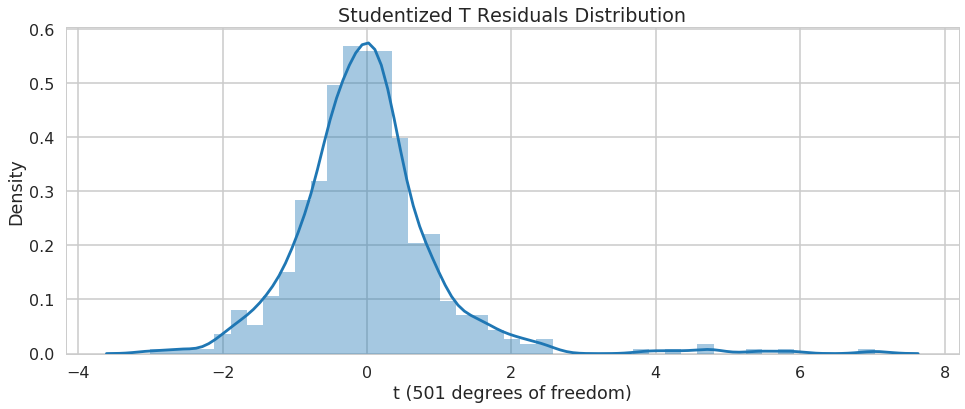

In [23]:
# plot the studentized residuals histogram
_ = plt.figure(figsize = (16, 6))
_ = sns.distplot(m_crim_rm_ptratio_price.outlier_test().student_resid, norm_hist = True)
_ = plt.title('Studentized T Residuals Distribution')
_ = plt.xlabel('t (501 degrees of freedom)')
_ = plt.ylabel('Density')
plt.show()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


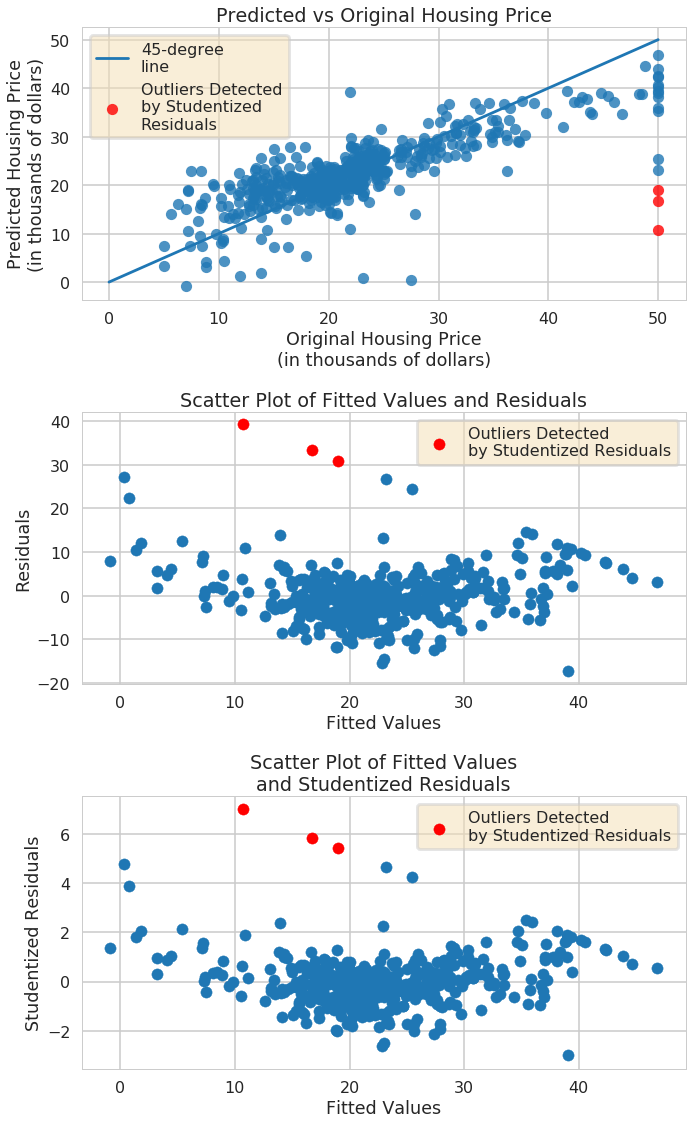

In [24]:
studentized_outliers_idx = m_crim_rm_ptratio_price.fittedvalues.index.isin(studentized_outliers.index)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 16))

# Scatter plot fitted values vs actual values (studentized outliers)
_ = sns.regplot(y = m_crim_rm_ptratio_price.fittedvalues[studentized_outliers_idx], 
                x = bos.PRICE[studentized_outliers_idx],
                fit_reg = False, 
                ax = ax1,
                color = 'r')
_ = sns.regplot(y = m_crim_rm_ptratio_price.fittedvalues[~studentized_outliers_idx], 
                x = bos.PRICE[~studentized_outliers_idx],
                fit_reg = False, 
                ax = ax1,
                color = '#1f77b4')
_ = ax1.set_ylabel('Predicted Housing Price\n(in thousands of dollars)')
_ = ax1.set_xlabel('Original Housing Price\n(in thousands of dollars)')
_ = ax1.set_title('Predicted vs Original Housing Price')
_ = ax1.plot([0, 50], [0, 50]) # 45 degree line
legend = ax1.legend(['45-degree\nline', 'Outliers Detected\nby Studentized\nResiduals'], frameon = True, 
                    facecolor = 'Wheat', framealpha = 0.5)
legend.get_frame().set_linewidth(3)

# scatter plot of residuals and fitted values (studentized outliers)
_ = ax2.scatter(x = m_crim_rm_ptratio_price.fittedvalues[studentized_outliers_idx], 
                  y = m_crim_rm_ptratio_price.resid[studentized_outliers_idx], 
                  color = 'r')
_ = ax2.scatter(x = m_crim_rm_ptratio_price.fittedvalues[~studentized_outliers_idx], 
                  y = m_crim_rm_ptratio_price.resid[~studentized_outliers_idx], 
                  color = '#1f77b4')
_ = ax2.set_xlabel('Fitted Values')
_ = ax2.set_ylabel('Residuals')
_ = ax2.set_title('Scatter Plot of Fitted Values and Residuals')
legend = ax2.legend(['Outliers Detected\nby Studentized Residuals'], frameon = True, facecolor = 'Wheat', framealpha = 0.5)
legend.get_frame().set_linewidth(3)

# scatter plot of studentized residuals and fitted values (studentized outliers)
_ = ax3.scatter(x = m_crim_rm_ptratio_price.fittedvalues[studentized_outliers_idx], 
                  y = m_crim_rm_ptratio_price.outlier_test().student_resid[studentized_outliers_idx], 
                  color = 'r')
_ = ax3.scatter(x = m_crim_rm_ptratio_price.fittedvalues[~studentized_outliers_idx], 
                  y = m_crim_rm_ptratio_price.outlier_test().student_resid[~studentized_outliers_idx],
                  color = '#1f77b4')
_ = ax3.set_xlabel('Fitted Values')
_ = ax3.set_ylabel('Studentized Residuals')
_ = ax3.set_title('Scatter Plot of Fitted Values\nand Studentized Residuals')
legend = ax3.legend(['Outliers Detected\nby Studentized Residuals'], frameon = True, facecolor = 'Wheat', framealpha = 0.5)
legend.get_frame().set_linewidth(3)

fig.tight_layout()
fig.show()

In [25]:
# add fitted values to original data frame
bos['Predicted_Price'] = m_crim_rm_ptratio_price.fittedvalues

# select rows from original data frame for outliers identified by studentized residuals
# select CRIM, RM, PTRATIO columns
wanted_column_idx = [bos.columns.get_loc(c) for c in bos.columns if c in ['CRIM', 'RM', 'PTRATIO', 'PRICE', 'Predicted_Price']]
bos.iloc[studentized_outliers_idx, wanted_column_idx]

,CRIM,RM,PTRATIO,PRICE,Predicted_Price
368,4.89822,4.970,20.2,50.0,10.691218
371,9.23230,6.216,20.2,50.0,19.012691
372,8.26725,5.875,20.2,50.0,16.690622


Based on the studentized distribution and the adjusted Bonferroni p-values, it seems as though there are three potential outliers. Among the three points, it is clear that the predicted values are very different from the actual price of the house. 

What these values might represent:

* The houses with actual housing values of $50,000 might be an error in the data entry. 
* These data points might represent anomalies that the linear model does not pick up.

**5. Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.**

Although it is a rule of thumb that high leverage points follow the following criteria:

$$h_{ii} > 3 \left(\frac{p}{n}\right) = 0.024$$

where 
* $h_{ii}$ is the leverage value, which quantifies the influence that the observed $y_i$ has on the predicted value $\hat{y}_i$
* $p = 4$ is the number of parameters to estimate, including the slope
* $n = 506$ is the sample size

I will instead change the cut off to 0.05 after observing the data and the plots below. The reason for this is because the cut off at 0.024 would generate too many high leverage points. In this model, it seems as though there are many points that have relatively high leverage values. However, there are a select few observations where it's noticeable that their leverage values are pretty large compared to the rest of the points.

In answering this question, I took some functions from statsmodels and tweaked it a little to adjust for the plot size and font size.

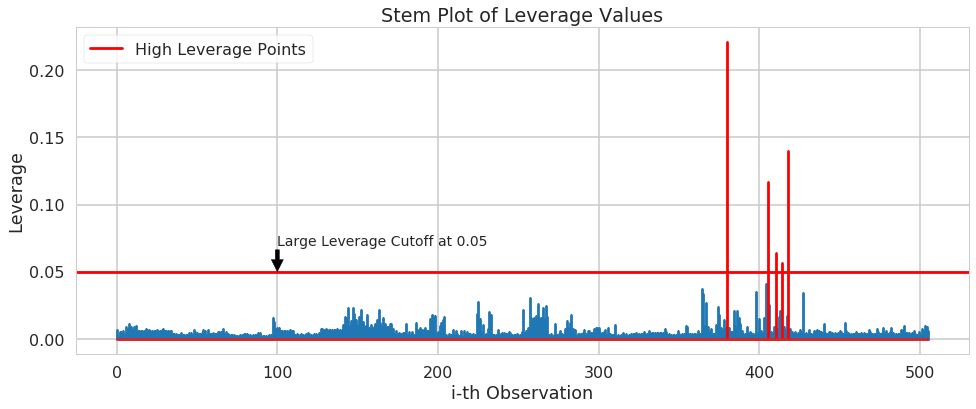

In [26]:
n = len(bos.PRICE)
p = 4
influence = m_crim_rm_ptratio_price.get_influence()
leverage = influence.hat_matrix_diag
large_leverage_cutoff = 0.05
large_leverage = leverage > large_leverage_cutoff

# create dataframe for plotting
leverage_df = pd.DataFrame({'leverage': leverage}).reset_index()
h1 = leverage_df[~large_leverage].index
h2 = leverage_df[large_leverage].index

# create stemplot
_ = plt.figure(figsize = (16, 6))
markerline1, stemlines, _ = plt.stem(h1, leverage[~large_leverage], markerfmt=",")
_ = plt.setp(stemlines, color = '#1f77b4')
markerline2, stemlines, _ = plt.stem(h2, leverage[large_leverage], markerfmt=",")
_ = plt.setp(stemlines, color = 'r')
_ = plt.axhline(y = large_leverage_cutoff, color = 'r')
_ = plt.annotate('Large Leverage Cutoff at {}'.format(round(large_leverage_cutoff, 3)), 
                 xy = (100, large_leverage_cutoff), 
                 xytext = (100, 0.07), 
                 arrowprops = dict(facecolor = 'black'),
                 fontsize = 14)
_ = plt.title('Stem Plot of Leverage Values')
_ = plt.xlabel('i-th Observation')
_ = plt.ylabel('Leverage')
_ = plt.legend(['High Leverage Points'], frameon = True)

plt.show()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


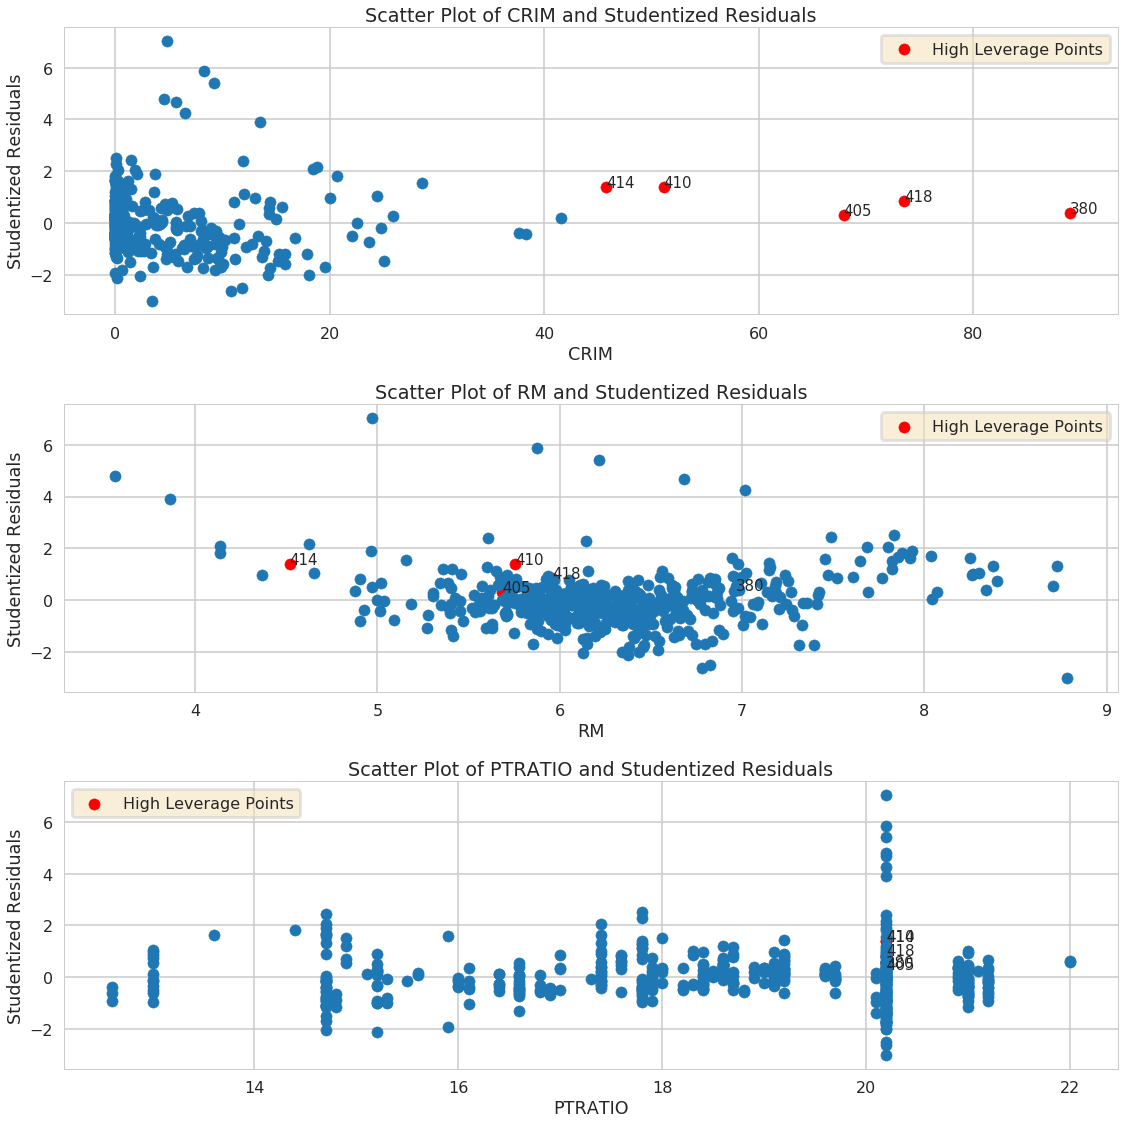

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (16, 16))

# scatter plot of Studentized Residuals and CRIM
_ = ax1.scatter(x = bos.CRIM[large_leverage], 
                  y = m_crim_rm_ptratio_price.outlier_test().student_resid[large_leverage], 
                  color = 'r')
_ = ax1.scatter(x = bos.CRIM[~large_leverage], 
                  y = m_crim_rm_ptratio_price.outlier_test().student_resid[~large_leverage], 
                  color = '#1f77b4')
_ = ax1.set_xlabel('CRIM')
_ = ax1.set_ylabel('Studentized Residuals')
_ = ax1.set_title('Scatter Plot of CRIM and Studentized Residuals')
legend = ax1.legend(['High Leverage Points'], frameon = True, facecolor = 'Wheat', framealpha = 0.5)
legend.get_frame().set_linewidth(3)

for txt in h2:
    ax1.annotate(txt, (bos.CRIM[large_leverage][txt], 
                       m_crim_rm_ptratio_price.outlier_test().student_resid[large_leverage][txt]), fontsize = 15)
    
# scatter plot of Studentized Residuals and RM
_ = ax2.scatter(x = bos.RM[large_leverage], 
                  y = m_crim_rm_ptratio_price.outlier_test().student_resid[large_leverage], 
                  color = 'r')
_ = ax2.scatter(x = bos.RM[~large_leverage], 
                  y = m_crim_rm_ptratio_price.outlier_test().student_resid[~large_leverage], 
                  color = '#1f77b4')
_ = ax2.set_xlabel('RM')
_ = ax2.set_ylabel('Studentized Residuals')
_ = ax2.set_title('Scatter Plot of RM and Studentized Residuals')
legend = ax2.legend(['High Leverage Points'], frameon = True, facecolor = 'Wheat', framealpha = 0.5)
legend.get_frame().set_linewidth(3)

for txt in h2:
    ax2.annotate(txt, (bos.RM[large_leverage][txt], 
                       m_crim_rm_ptratio_price.outlier_test().student_resid[large_leverage][txt]), fontsize = 15)
    
# scatter plot of studentized Studentized Residuals and PTRATIO
_ = ax3.scatter(x = bos.PTRATIO[large_leverage], 
                  y = m_crim_rm_ptratio_price.outlier_test().student_resid[large_leverage], 
                  color = 'r')
_ = ax3.scatter(x = bos.PTRATIO[~large_leverage], 
                  y = m_crim_rm_ptratio_price.outlier_test().student_resid[~large_leverage],
                  color = '#1f77b4')
_ = ax3.set_xlabel('PTRATIO')
_ = ax3.set_ylabel('Studentized Residuals')
_ = ax3.set_title('Scatter Plot of PTRATIO and Studentized Residuals')
legend = ax3.legend(['High Leverage Points'], frameon = True, facecolor = 'Wheat', framealpha = 0.5)
legend.get_frame().set_linewidth(3)

for txt in h2:
    ax3.annotate(txt, (bos.PTRATIO[large_leverage][txt],
                       m_crim_rm_ptratio_price.outlier_test().student_resid[large_leverage][txt]), fontsize = 15)

fig.tight_layout()
fig.show()

In [28]:
def create_mpl_ax(ax=None):
    """
    Helper function for when a single plot axis is needed.

    Parameters
    ----------
    ax : Matplotlib AxesSubplot instance, optional
        If given, this subplot is used to plot in instead of a new figure being
        created.

    Returns
    -------
    fig : Matplotlib figure instance
        If `ax` is None, the created figure.  Otherwise the figure to which
        `ax` is connected.
    ax : Matplotlib AxesSubplot instance
        The created axis if `ax` is None, otherwise the axis that was passed
        in.

    Notes
    -----
    This function imports `matplotlib.pyplot`, which should only be done to
    create (a) figure(s) with ``plt.figure``.  All other functionality exposed
    by the pyplot module can and should be imported directly from its
    Matplotlib module.

    See Also
    --------
    create_mpl_fig

    Examples
    --------
    A plotting function has a keyword ``ax=None``.  Then calls:

    >>> from statsmodels.graphics import utils
    >>> fig, ax = utils.create_mpl_ax(ax)
    """
    
    if ax is None:
        fig = plt.figure(figsize = (12, 8))
        ax = fig.add_subplot(111)
    else:
        fig = ax.figure

    return fig, ax

from statsmodels.compat.python import lrange, lzip

def _high_leverage(results):
    '''Function that calculates and returns boolean of high leverage points'''    
    return 3. * (results.df_model + 1)/results.nobs

def plot_leverage_resid2(results, alpha=.05, ax=None,
                         **kwargs):

    """
    Plots leverage statistics vs. normalized residuals squared

    Parameters
    ----------
    results : results instance
        A regression results instance
    alpha : float
        Specifies the cut-off for large-standardized residuals. Residuals
        are assumed to be distributed N(0, 1) with alpha=alpha.
    ax : Axes instance
        Matplotlib Axes instance

    Returns
    -------
    fig : matplotlib Figure
        A matplotlib figure instance.
    """
    
    from scipy.stats import zscore, norm

    fig, ax = create_mpl_ax(ax)

    infl = results.get_influence()
    leverage = infl.hat_matrix_diag
    resid = zscore(results.resid)
    ax.plot(resid**2, leverage, 'o', **kwargs)
    ax.set_xlabel("Normalized residuals**2")
    ax.set_ylabel("Leverage")
    ax.set_title("Leverage vs. Normalized residuals squared")

    large_leverage = leverage > _high_leverage(results)
    #norm or t here if standardized?
    cutoff = norm.ppf(1.-alpha/2)
    large_resid = np.abs(resid) > cutoff
    labels = results.model.data.row_labels
    if labels is None:
        labels = lrange(int(results.nobs))
    index = np.where(np.logical_or(large_leverage, large_resid))[0]
    ax = utils.annotate_axes(index, labels, lzip(resid**2, leverage),
                             [(0, 5)]*int(results.nobs), "large",
                             ax=ax, ha="center", va="bottom")
    ax.margins(.075, .075)
    return fig

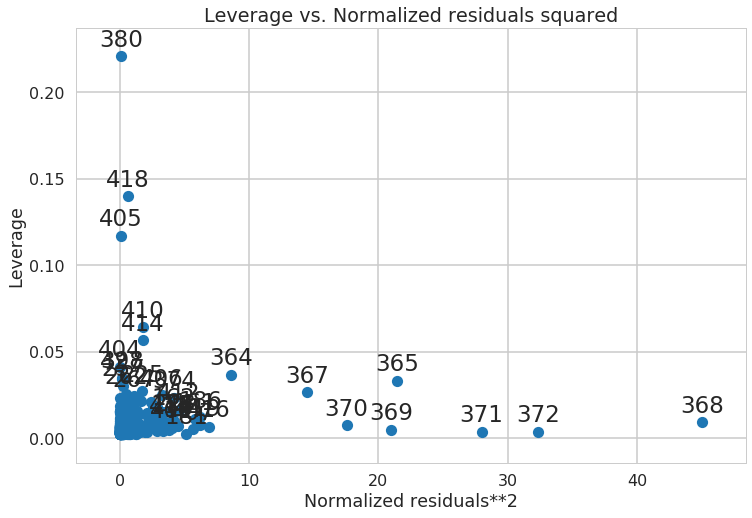

In [29]:
_ = plot_leverage_resid2(m_crim_rm_ptratio_price)

In [30]:
def influence_plot(results, external=True, alpha=.05, criterion="cooks",
                   size=48, plot_alpha=.75, ax=None, **kwargs):
    """
    Plot of influence in regression. Plots studentized resids vs. leverage.

    Parameters
    ----------
    results : results instance
        A fitted model.
    external : bool
        Whether to use externally or internally studentized residuals. It is
        recommended to leave external as True.
    alpha : float
        The alpha value to identify large studentized residuals. Large means
        abs(resid_studentized) > t.ppf(1-alpha/2, dof=results.df_resid)
    criterion : str {'DFFITS', 'Cooks'}
        Which criterion to base the size of the points on. Options are
        DFFITS or Cook's D.
    size : float
        The range of `criterion` is mapped to 10**2 - size**2 in points.
    plot_alpha : float
        The `alpha` of the plotted points.
    ax : matplotlib Axes instance
        An instance of a matplotlib Axes.

    Returns
    -------
    fig : matplotlib figure
        The matplotlib figure that contains the Axes.

    Notes
    -----
    Row labels for the observations in which the leverage, measured by the
    diagonal of the hat matrix, is high or the residuals are large, as the
    combination of large residuals and a high influence value indicates an
    influence point. The value of large residuals can be controlled using the
    `alpha` parameter. Large leverage points are identified as
    hat_i > 2 * (df_model + 1)/nobs.
    """
    fig, ax = create_mpl_ax(ax)

    infl = results.get_influence()

    if criterion.lower().startswith('coo'):
        psize = infl.cooks_distance[0]
    elif criterion.lower().startswith('dff'):
        psize = np.abs(infl.dffits[0])
    else:
        raise ValueError("Criterion %s not understood" % criterion)

    # scale the variables
    #TODO: what is the correct scaling and the assumption here?
    #we want plots to be comparable across different plots
    #so we would need to use the expected distribution of criterion probably
    old_range = np.ptp(psize)
    new_range = size**2 - 8**2

    psize = (psize - psize.min()) * new_range/old_range + 8**2

    leverage = infl.hat_matrix_diag
    if external:
        resids = infl.resid_studentized_external
    else:
        resids = infl.resid_studentized_internal

    from scipy import stats

    cutoff = stats.t.ppf(1.-alpha/2, results.df_resid)
    large_resid = np.abs(resids) > cutoff
    large_leverage = leverage > _high_leverage(results)
    large_points = np.logical_or(large_resid, large_leverage)

    ax.scatter(leverage, resids, s=psize, alpha=plot_alpha)

    # add point labels
    labels = results.model.data.row_labels
    if labels is None:
        labels = lrange(len(resids))
    ax = utils.annotate_axes(np.where(large_points)[0], labels,
                             lzip(leverage, resids),
                             lzip(-(psize/2)**.5, (psize/2)**.5), "large",
                             ax)

    #TODO: make configurable or let people do it ex-post?
    font = {"fontsize" : 16, "color" : "black"}
    ax.set_ylabel("Studentized Residuals", **font)
    ax.set_xlabel("H Leverage", **font)
    ax.set_title("Influence Plot", **font)
    return fig

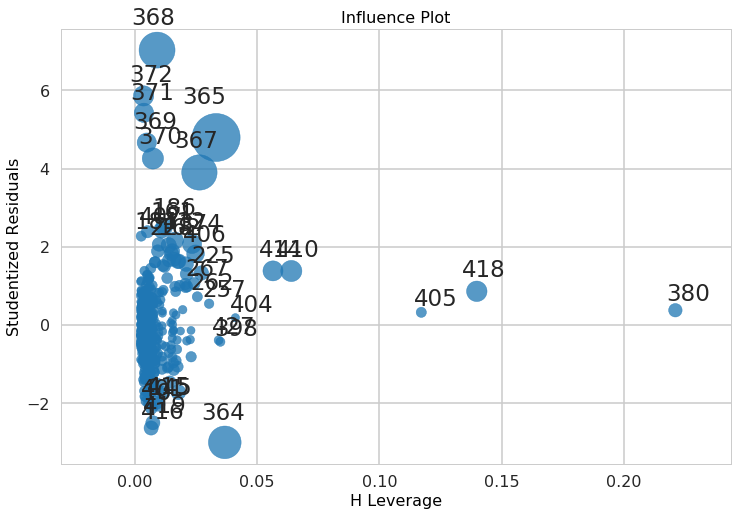

In [31]:
_ = influence_plot(m_crim_rm_ptratio_price)

In [32]:
# add leverage column to data
bos['leverage'] = leverage
# select rows from original data frame for points with large leverage
bos.iloc[large_leverage, wanted_column_idx]

,CRIM,RM,PTRATIO,PRICE,Predicted_Price
380,88.9762,6.968,20.2,10.4,8.446612
405,67.9208,5.683,20.2,5.0,3.216800
410,51.1358,5.757,20.2,15.0,7.155447
414,45.7461,4.519,20.2,7.0,-0.893622
418,73.5341,5.957,20.2,8.8,4.104847


Based on the plots and the dataframe above, I can see that all the high leverage points come from observations that have high crime rates. It is important to note that high leverage points are not influential points. High leverage points are defined as observations in which the predictor values are higher than the rest of the data. This does not necessarily mean that these points would have high influence. To measure influence, I would examine DIFFITS and Cook's Distance values.

**6. Remove the outliers and high leverage points from your model and run the regression again. How do the results change?**

In [33]:
# remove high leverage points and outliers
bos_no_extreme = bos[~(large_leverage | studentized_outliers_idx)]

# using statsmodels
m_crim_rm_ptratio_price_no_extreme = ols('PRICE ~ CRIM + RM + PTRATIO',bos_no_extreme).fit()
m_crim_rm_ptratio_price_no_extreme.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     321.8
Date:                Wed, 25 Jul 2018   Prob (F-statistic):          9.02e-116
Time:                        18:35:26   Log-Likelihood:                -1526.0
No. Observations:                 498   AIC:                             3060.
Df Residuals:                     494   BIC:                             3077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3706      3.593     -1.216      0.224     -11.431       2.690
CRIM          -0.3058      0.044     -7.020      0.000      -0.391      -0.220
RM             7.5187      0.362     20.744      0.000       6.807       8.231
PTRATIO       -1.0606      0.119     -8.887      0.000      -1.295      -0.826
==============================================================================
Omnibus:                      133.181   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              597.201
Skew:                           1.113   Prob(JB):                    2.09e-130
Kurtosis:                       7.881   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/root/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


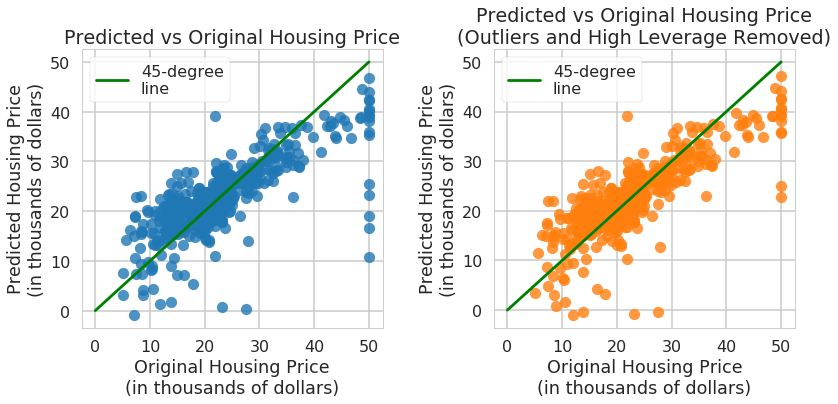

In [34]:
# scatter plots for fitted values vs actual values for model with extreme values and model without extreme values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# model with extreme values
_ = sns.regplot(x = bos.PRICE, y = m_crim_rm_ptratio_price.fittedvalues, fit_reg = False, ax = ax1)
_ = ax1.plot([0, 50], [0, 50], color = 'g')
_ = ax1.set_ylabel('Predicted Housing Price\n(in thousands of dollars)')
_ = ax1.set_xlabel('Original Housing Price\n(in thousands of dollars)')
_ = ax1.set_title('Predicted vs Original Housing Price')
_ = ax1.legend(['45-degree\nline'], frameon = True)

# model without extreme values
_ = sns.regplot(x = bos_no_extreme.PRICE, y = m_crim_rm_ptratio_price_no_extreme.fittedvalues, fit_reg = False, ax = ax2)
_ = ax2.plot([0, 50], [0, 50], color = 'g')
_ = ax2.set_ylabel('Predicted Housing Price\n(in thousands of dollars)')
_ = ax2.set_xlabel('Original Housing Price\n(in thousands of dollars)')
_ = ax2.set_title('Predicted vs Original Housing Price\n(Outliers and High Leverage Removed)')
_ = ax2.legend(['45-degree\nline'], frameon = True)

fig.tight_layout()
fig.show()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


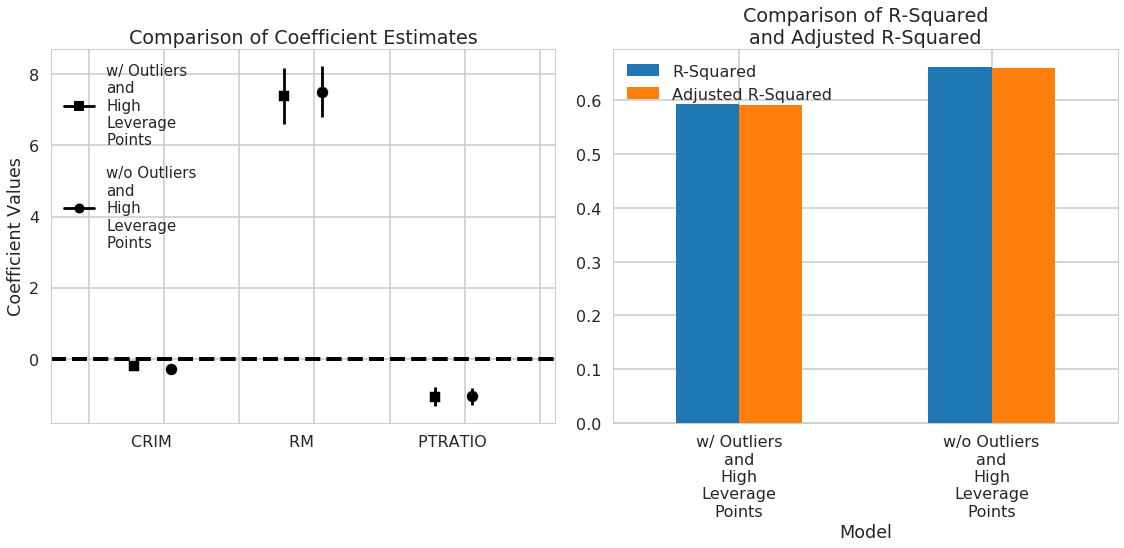

In [35]:
# dataframe of estimated coefficients to be used for plotting
coef_df = pd.DataFrame()
labels = ['w/ Outliers\nand\nHigh\nLeverage\nPoints', 'w/o Outliers\nand\nHigh\nLeverage\nPoints']
for i, mod in enumerate([m_crim_rm_ptratio_price, m_crim_rm_ptratio_price_no_extreme]):
    err_series = mod.params - mod.conf_int()[0]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values[1:],
                                           'err': err_series.values[1:],
                                           'varname': err_series.index.values[1:],
                                           'model': labels[i]}))

# dataframe of rsquared and adj rsquared values to be used for plotting
rsquared_df = pd.DataFrame({'rsquared': [m_crim_rm_ptratio_price.rsquared, 
                                         m_crim_rm_ptratio_price_no_extreme.rsquared],
                            'rsquared_adj': [m_crim_rm_ptratio_price.rsquared_adj, 
                                             m_crim_rm_ptratio_price_no_extreme.rsquared_adj],
                            'model': labels[i]})
rsquared_df

## marker to use
marker_list = 'so'
width=0.25
## 5 covariates in total
base_x = pd.np.arange(3) - 0.2

# plot to compare coefficients and rsquared/adj rsquared for model with extreme values and model without extreme values
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 8))

# plot of coefficient comparison btwn model w/ extreme values and model w/o extreme values
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x posistions
    X = base_x + width*i
    ax1.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'])
    ## remove ax1is labels
    ax1.set_ylabel('Coefficient Values')
    ax1.set_xlabel('')
    ax1.set_title('Comparison of Coefficient Estimates')
    ax1.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color='black')
    ax1.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax1.xaxis.set_ticks_position('none')
    _ = ax1.set_xticklabels(['', '', 'CRIM     ','', 'RM     ', '', 'PTRATIO     '], 
                           rotation=0, fontsize=16)

    fs = 16
    
# build customized legend
legend_elements = [Line2D([0], [0], marker=m,
                          label=labels[i],
                          color = 'k',
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax1.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

# bar plot to compare rsquared and adj rsquared values for model w/ extreme values and model w/o extreme values
_ = rsquared_df.plot(x = 'model', y = rsquared_df.columns[:-1], kind = 'bar', ax = ax2)
_ = ax2.set_title('Comparison of R-Squared\nand Adjusted R-Squared')
_ = ax2.legend(['R-Squared', 'Adjusted R-Squared'], loc = 'upper left')
_ = ax2.set_xlabel('Model')
_ = ax2.set_xticklabels(labels = labels, rotation = 0)

fig.tight_layout()
fig.show()

Based on the plots and the summary outputs of the linear model, we can see that the R-squared and the adjusted R-squared values for the model without outliers and high leverage points are higher. This suggests that the model without the high leverage values and outliers fit the data better.

We also see that the coefficient values for the two models are similar.